In [1]:
import glob

import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

## EDA for csv data (pawpularity score)

In [2]:
train_data = pd.read_csv("./petfinder/data/raw/train.csv")
test_data = pd.read_csv("./petfinder/data/raw/test.csv")

In [3]:
train_data.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [4]:
test_data.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,4128bae22183829d2b5fea10effdb0c3,1,0,1,0,0,1,1,0,0,1,0,1
1,43a2262d7738e3d420d453815151079e,0,1,0,0,0,0,1,1,0,0,0,0
2,4e429cead1848a298432a0acad014c9d,0,0,0,1,0,1,1,1,0,1,1,1
3,80bc3ccafcc51b66303c2c263aa38486,1,0,1,0,0,0,0,0,0,0,1,0
4,8f49844c382931444e68dffbe20228f4,1,1,1,0,1,1,0,1,0,1,1,0


In [5]:
train_data.shape

(9912, 14)

In [6]:
test_data.shape

(8, 13)

In [7]:
train_data.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420,38.039044
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866,20.591990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [8]:
test_data.describe()

,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
count,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,0.625000,0.25000,0.625000,0.25000,0.375000,0.625000,0.500000,0.625000,0.25000,0.500000,0.625000,0.500000
std,0.517549,0.46291,0.517549,0.46291,0.517549,0.517549,0.534522,0.517549,0.46291,0.534522,0.517549,0.534522
min,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.500000,1.000000,0.00000,0.500000,1.000000,0.500000
75%,1.000000,0.25000,1.000000,0.25000,1.000000,1.000000,1.000000,1.000000,0.25000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [9]:
for c in train_data.columns.tolist()[:-1]:
    train_data[c] = train_data[c].astype("category")

In [10]:
train_data.dtypes

Id               category
Subject Focus    category
Eyes             category
Face             category
Near             category
Action           category
Accessory        category
Group            category
Collage          category
Human            category
Occlusion        category
Info             category
Blur             category
Pawpularity         int64
dtype: object

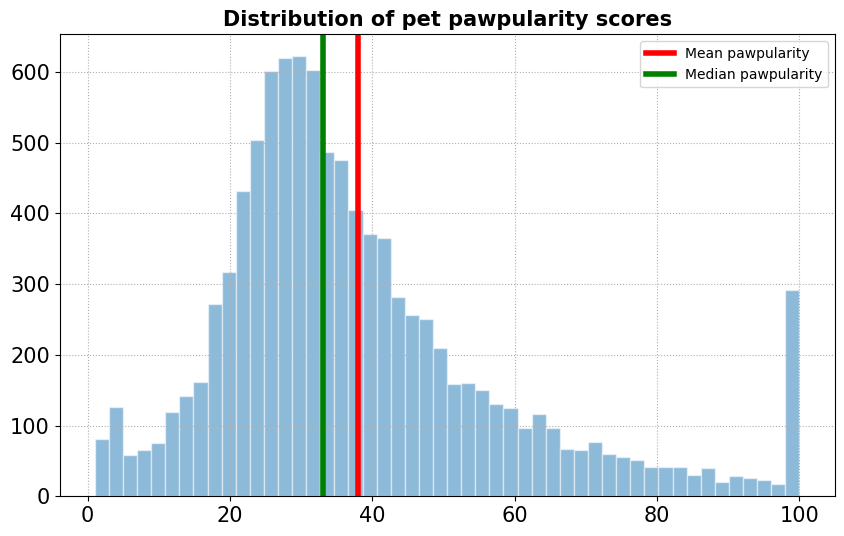

In [11]:
mean_pawpularity = train_data["Pawpularity"].mean()
median_pawpularity = train_data["Pawpularity"].median()

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(train_data["Pawpularity"], bins=50, alpha=0.5, edgecolor="white")
ax.grid(linestyle=":")

ax.set_title("Distribution of pet pawpularity scores", weight="bold", size=15)
ax.tick_params(labelsize=15)
ax.axvline(mean_pawpularity, lw=4, color="r", label="Mean pawpularity")
ax.axvline(median_pawpularity, lw=4, color="green", label="Median pawpularity")

ax.legend()

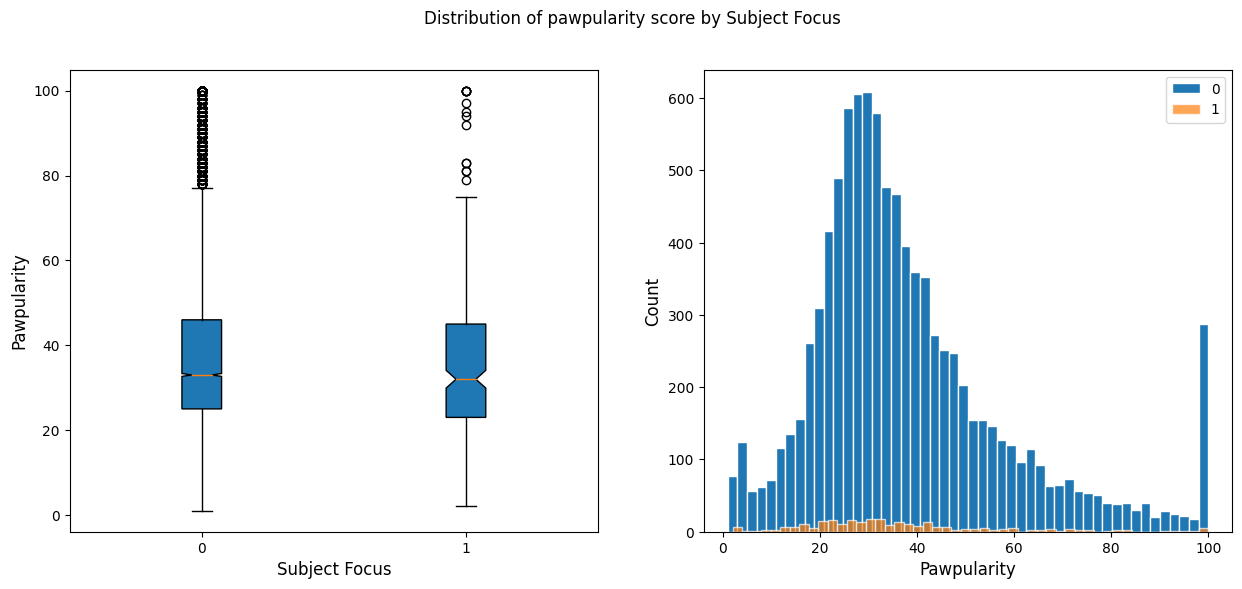

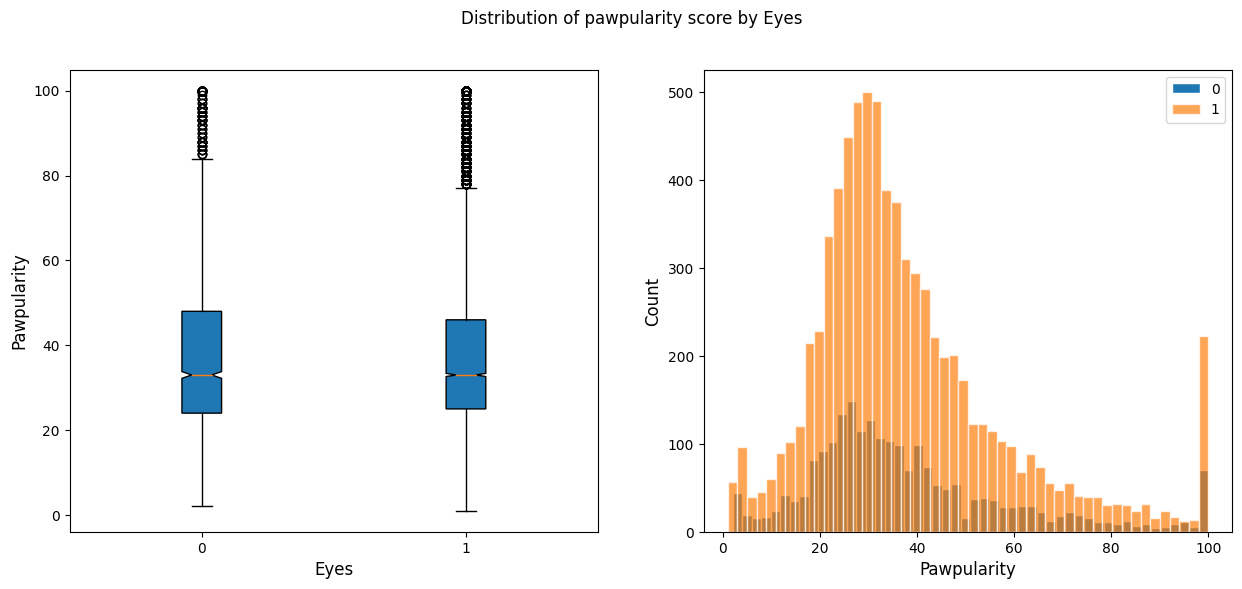

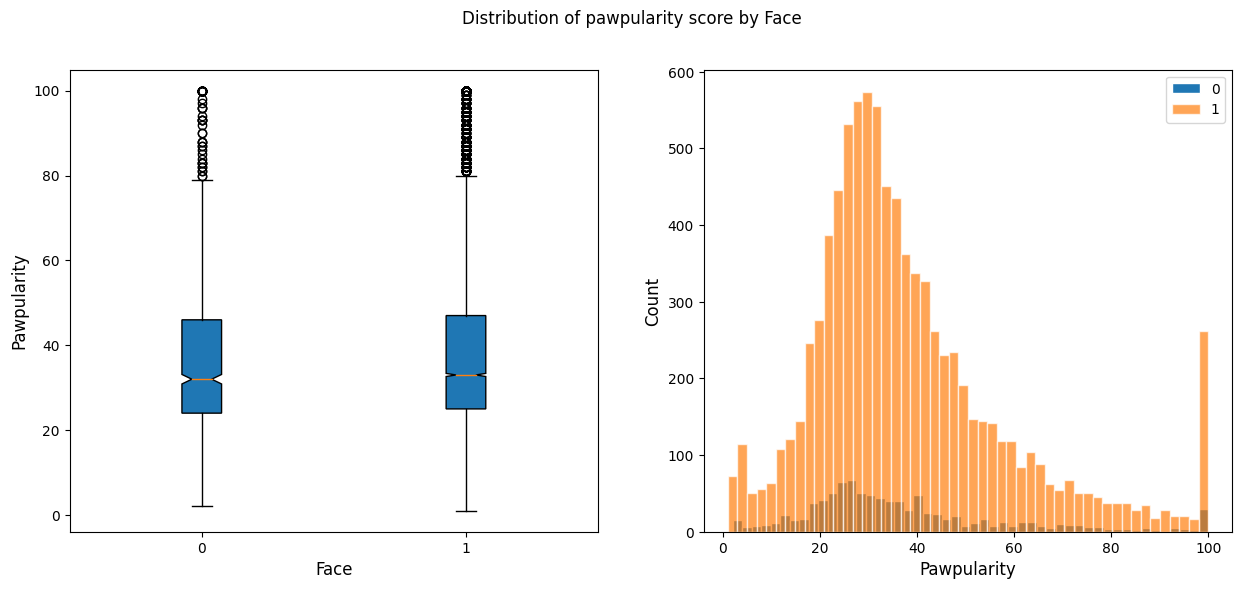

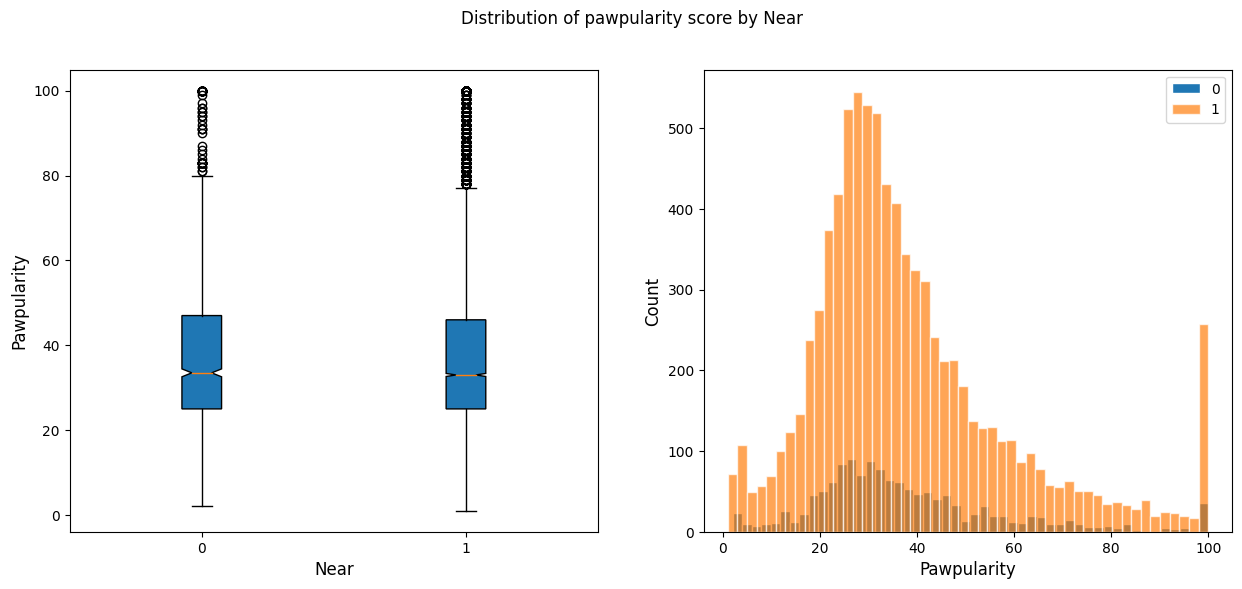

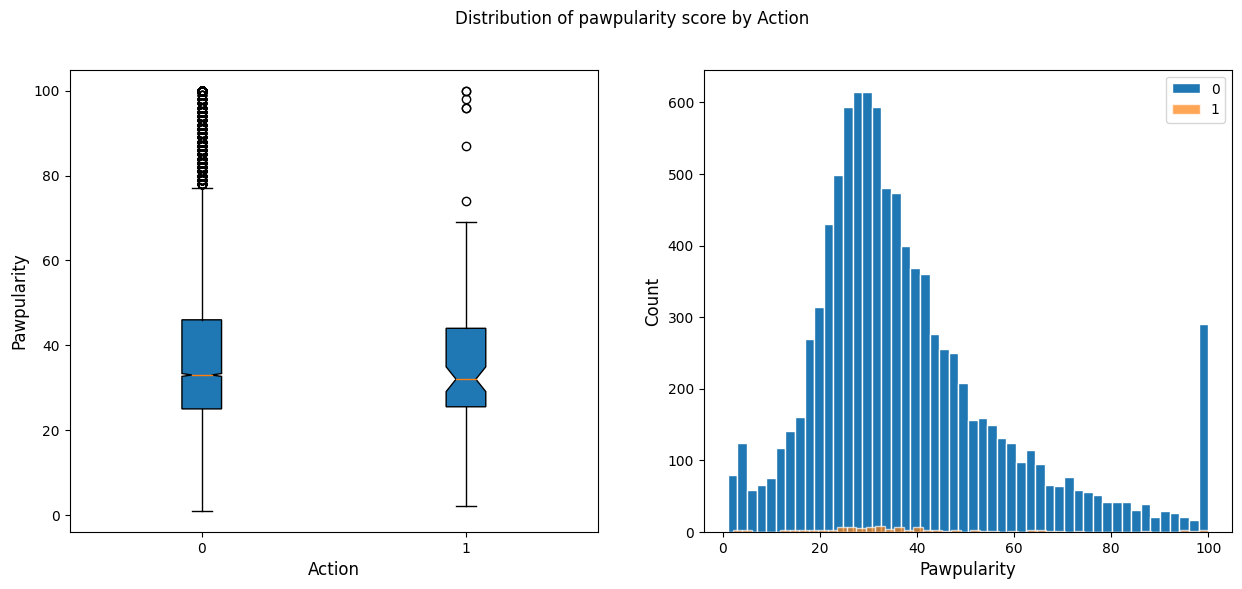

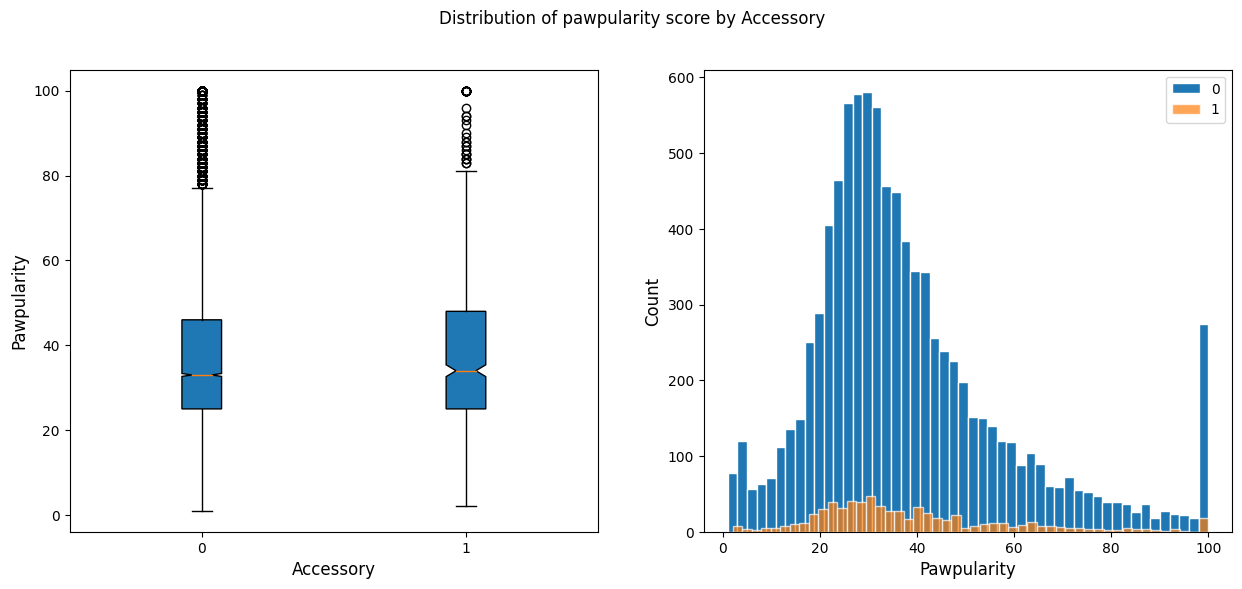

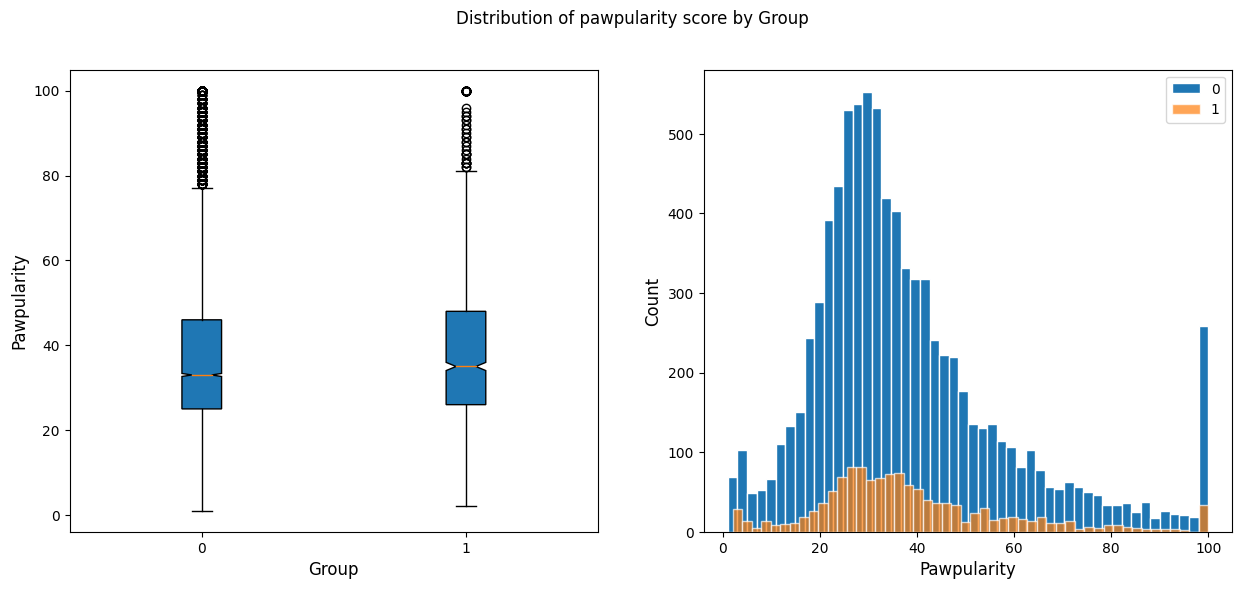

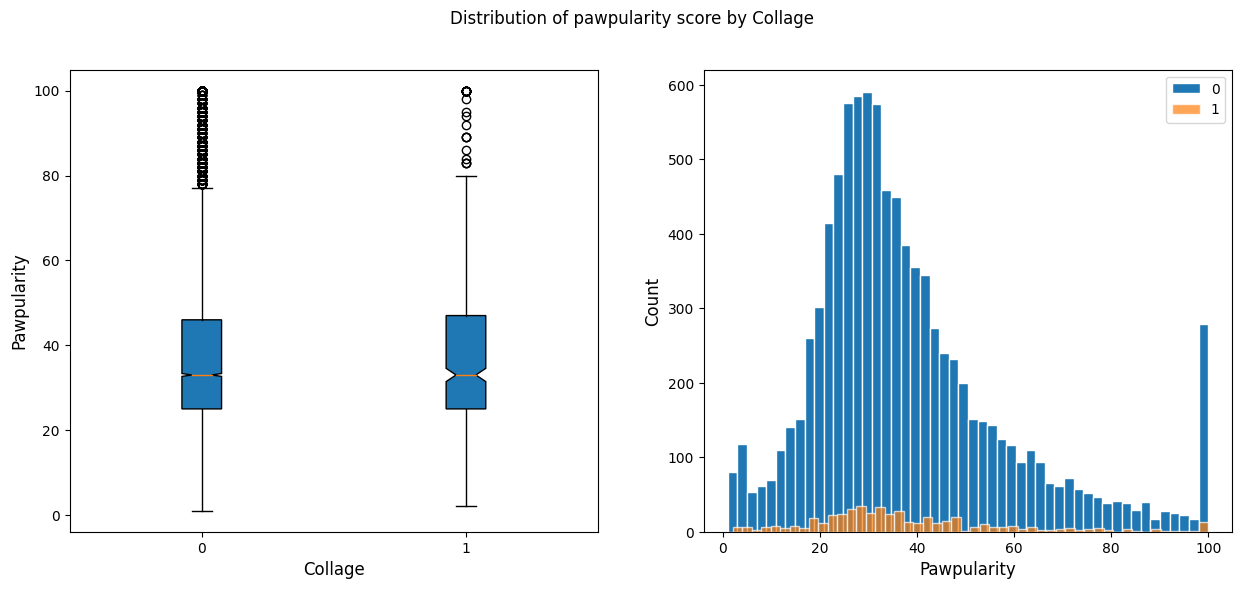

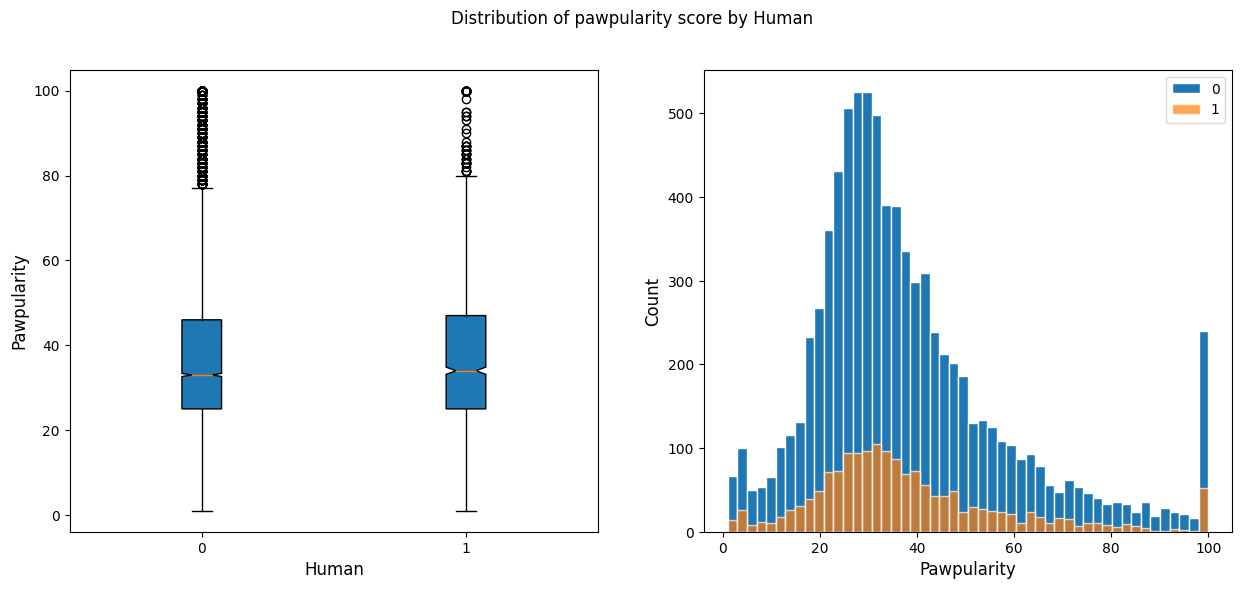

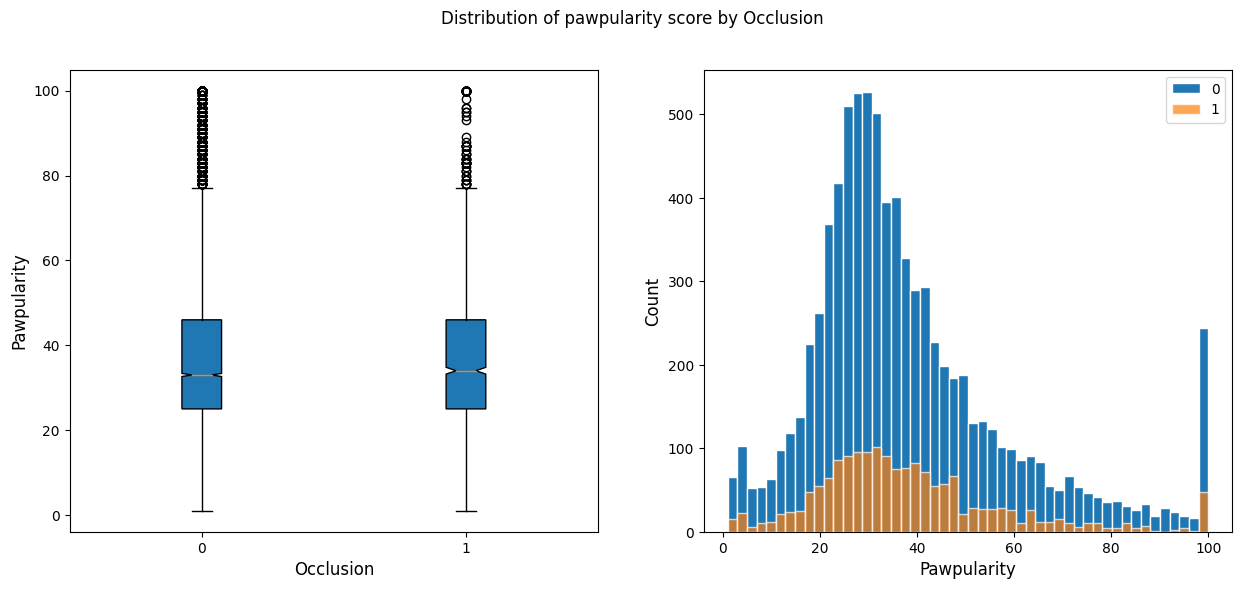

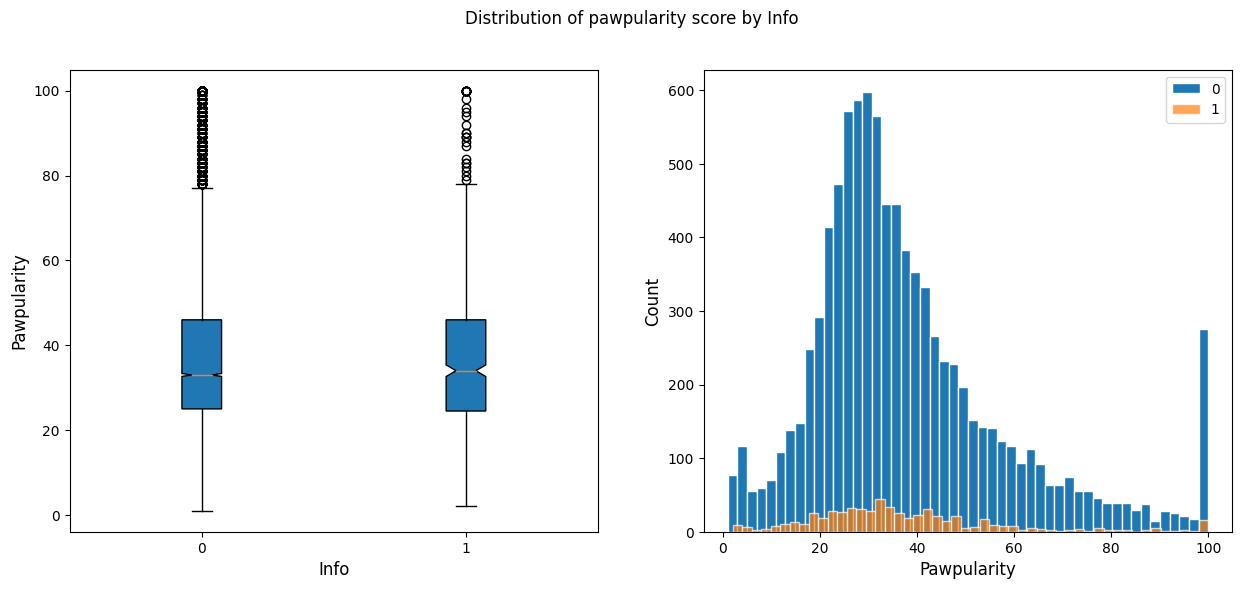

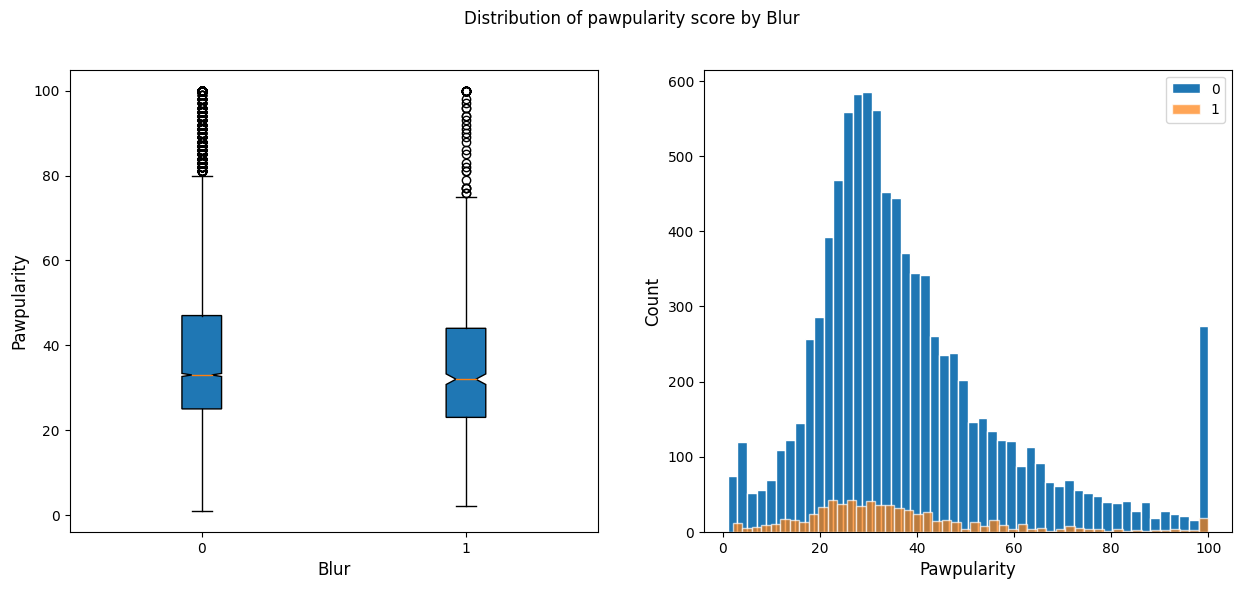

In [12]:
col_list = train_data.drop(["Id", "Pawpularity"], axis=1).columns.tolist()
target_name = "Pawpularity"
google_red_green = ["#4285F4", "#DB4437"]

for col in col_list:
    
    grouped = [
        train_data.loc[train_data[col] == v, target_name]
        for v in sorted(train_data[col].unique())
    ]
    labels = [v for v in sorted(train_data[col].unique())]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 
    ax1.boxplot(x=grouped, labels=labels, notch=True, patch_artist=True)
    ax1.set_xlabel(col, fontsize=12)
    ax1.set_ylabel(target_name, fontsize=12)
    
    for i, g in enumerate(grouped):
        ax2.hist(x=g, alpha=1.0 - 0.3*i, bins=50, edgecolor="white", label=labels[i])
    ax2.legend()
    ax2.set_xlabel(target_name, fontsize=12)
    ax2.set_ylabel("Count", fontsize=12)

    fig.suptitle(f"Distribution of pawpularity score by {col}")

## EDA for images

In [13]:
def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show()

In [14]:
def draw_random_image(image_list):
    """A function to load random image path from a list and plots it."""
    img_rand = np.random.choice(image_list)

    show(np.array(Image.open(img_rand, mode="r")))

In [15]:
train_image_paths = glob.glob("./petfinder/data/raw/train/*.jpg")

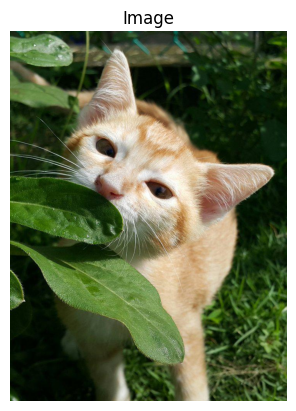

In [16]:
# randomly draw images
draw_random_image(train_image_paths)

In [17]:
# distribution of train image sizes
heights = []
widths = []

for path in train_image_paths:
    # load imgae
    img = Image.open(path, mode="r")
    # extract dimensions
    h, w = img.height, img.width

    heights.append(h)
    widths.append(w)

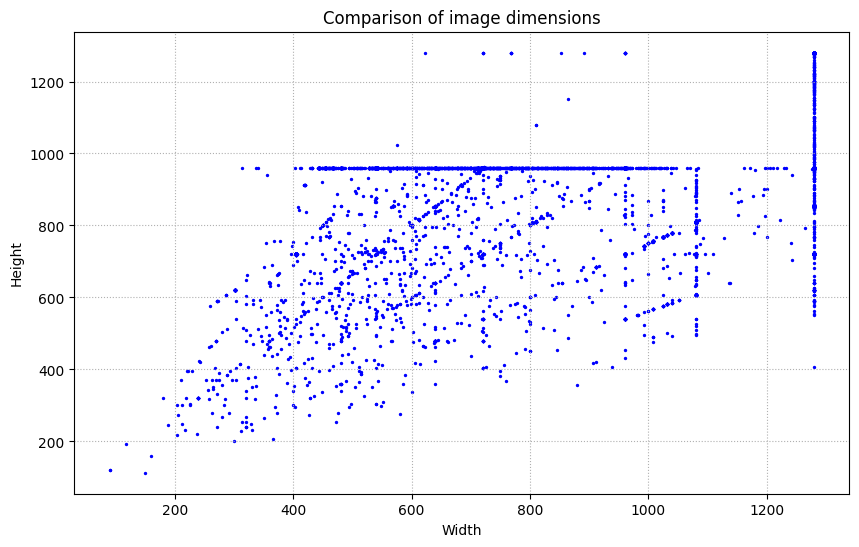

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(widths, heights, color="blue", s=2.0)
ax.grid(linestyle=":")
ax.set(title="Comparison of image dimensions", xlabel="Width", ylabel="Height");